# EDA on Crime Dataset (Spring 2023)
--------------------------------
**Dr. Dave Wanik - Department of Operations and Information Management - University of Connecticut**


Note: This assignment is used for OPIM 5641, 5502 and 5512 - if you are taking more than one of my classes, just submit this assignment for each respective class - thanks! 

Each question is 10 pts.

* **Your name here: Urvashi Vijay Bhurase**
* **Your student ID here: 3059409**

You can ask your fellow classmates for help, but everyone must do their own work with lots of comments and text cells. Anyone who directly copies or allows their work to be directly copied gets a 0 on the assignment and final letter grade lowered by one letter.

If you are new to Python, this assignment might be tricky - come to office hours for help! I've left some old output printed so that you can check your work.

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Intro

Whenever I start a class off, I like to make sure that students have basic EDA chops in Python. This semester I picked a structured time series dataset from Wikipedia which tracks violent crime per State over a few years. This homework tests your skill at using data to tell a story about crime in the US. Good luck!

![crime map from Wiki](https://upload.wikimedia.org/wikipedia/commons/5/51/Violent_Crime_Rate_by_U.S._state.svg)

In [ ]:
# read the data
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[0]
df.head()

State or Territory            2020                     \
     State or Territory Incidence Count Violent Crime Rate   
0                   NaN             NaN                NaN   
1  District of Columbia          7127.0              999.8   
2                Alaska          6126.0              837.8   
3            New Mexico         16393.0              778.3   
4             Tennessee         46328.0              672.7   

  Historical Violent Crime Rates                                         \
                            2019   2018    2017    2016    2015    2014   
0                            NaN    NaN     NaN     NaN     NaN     NaN   
1                         1045.2  997.1  1002.7  1203.5  1269.1  1242.6   
2                          865.0  891.7   856.7   804.6   730.2   635.5   
3                          824.0  842.8   778.6   699.4   656.1   597.7   
4                          598.9  630.4   655.0   638.5   612.1   610.7   

                           
     2013    2012    2011  
0     NaN     NaN     NaN  
1  1281.9  1241.8  1202.1  
2   602.6   604.1   606.5  
3   596.7   559.6   567.5  
4   579.7   638.5   608.2

This dataset is a bit dirty - let's clean it up!

# Q1. Collapse the multi-index
The index is really a double index with two layers - which in my experience is quite annoying in most cases. 

In [ ]:
# look at this complicated multiIndex - yuck!
df.columns
df.head()

State or Territory            2020                     \
     State or Territory Incidence Count Violent Crime Rate   
0                   NaN             NaN                NaN   
1  District of Columbia          7127.0              999.8   
2                Alaska          6126.0              837.8   
3            New Mexico         16393.0              778.3   
4             Tennessee         46328.0              672.7   

  Historical Violent Crime Rates                                         \
                            2019   2018    2017    2016    2015    2014   
0                            NaN    NaN     NaN     NaN     NaN     NaN   
1                         1045.2  997.1  1002.7  1203.5  1269.1  1242.6   
2                          865.0  891.7   856.7   804.6   730.2   635.5   
3                          824.0  842.8   778.6   699.4   656.1   597.7   
4                          598.9  630.4   655.0   638.5   612.1   610.7   

                           
     2013    2012    2011  
0     NaN     NaN     NaN  
1  1281.9  1241.8  1202.1  
2   602.6   604.1   606.5  
3   596.7   559.6   567.5  
4   579.7   638.5   608.2

Read these articles then make a single set of sensible column names.
* https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns
* https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas

Like ['State', '2020_incidence_count', '2020_crime_rate', '2019_crime_rate', etc.]

In [ ]:
# look at this nice index
# joined both multiindexes
df.columns = ["_".join(a) for a in df.columns.to_flat_index()]
df.head()

,State or Territory_State or Territory,2020_Incidence Count,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Historical Violent Crime Rates_2018,Historical Violent Crime Rates_2017,Historical Violent Crime Rates_2016,Historical Violent Crime Rates_2015,Historical Violent Crime Rates_2014,Historical Violent Crime Rates_2013,Historical Violent Crime Rates_2012,Historical Violent Crime Rates_2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2


In [ ]:
# nice names for each column (you can manually rename each column)
# or use something like _add_suffix
# Renamed the columns as desired

col_dict = {'State or Territory_State or Territory': 'State or Territory', 
            '2020 Incidence Count': '2020_Incidence Count',
            '2020 Violent Crime Rate': '2020_Violent Crime Rate',
            'Historical Violent Crime Rates_2019': '2019_Violent Crime Rate',
            'Historical Violent Crime Rates_2018': '2018_Violent Crime Rate',
            'Historical Violent Crime Rates_2017': '2017_Violent Crime Rate',
            'Historical Violent Crime Rates_2016': '2016_Violent Crime Rate',
            'Historical Violent Crime Rates_2015': '2015_Violent Crime Rate',
            'Historical Violent Crime Rates_2014': '2014_Violent Crime Rate',
            'Historical Violent Crime Rates_2013': '2013_Violent Crime Rate',
            'Historical Violent Crime Rates_2012': '2012_Violent Crime Rate',
            'Historical Violent Crime Rates_2011': '2011_Violent Crime Rate',
            } 
df.columns = [col_dict.get(x, x) for x in df.columns]
df.head()

 


,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,2019_Violent Crime Rate,2018_Violent Crime Rate,2017_Violent Crime Rate,2016_Violent Crime Rate,2015_Violent Crime Rate,2014_Violent Crime Rate,2013_Violent Crime Rate,2012_Violent Crime Rate,2011_Violent Crime Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2


# Q2. What is the shape of the dataframe?
State the number of rows and number of columns.

In [ ]:
#total number of rows and columns repectively in the dataset
df.shape

(54, 12)

# Q3. Count the number of missing values per column, then print a list of unique values for the State/territory column.

Read this:
* https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

Now drop any rows where the 'State or Territory' column is nan.

In [ ]:
# this gives the count of missing values per column
df.isnull().sum()

State or Territory         1
2020_Incidence Count       1
2020_Violent Crime Rate    1
2019_Violent Crime Rate    1
2018_Violent Crime Rate    1
2017_Violent Crime Rate    1
2016_Violent Crime Rate    1
2015_Violent Crime Rate    1
2014_Violent Crime Rate    1
2013_Violent Crime Rate    1
2012_Violent Crime Rate    1
2011_Violent Crime Rate    1
dtype: int64

In [ ]:
# dropped rows where the 'State or Territory' column is nan and created a copy 
df1 = df.dropna(subset= ['State or Territory'])
df1

# can also replace the original dataset with commented out code below
#df.dropna(subset= ['State or Territory'], inplace = True)
#df


,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,2019_Violent Crime Rate,2018_Violent Crime Rate,2017_Violent Crime Rate,2016_Violent Crime Rate,2015_Violent Crime Rate,2014_Violent Crime Rate,2013_Violent Crime Rate,2012_Violent Crime Rate,2011_Violent Crime Rate
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9
6,Arizona,35980.0,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9
7,Louisiana,29704.0,639.4,559.7,543.3,556.3,565.0,539.7,515.9,510.4,496.3,555.3
8,Missouri,33385.0,542.7,499.6,501.4,531.2,520.8,497.4,443.3,422.0,451.3,447.4
9,South Carolina,27691.0,530.7,510.1,500.8,506.1,506.8,504.5,497.8,494.8,560.5,571.9
10,South Dakota,4476.0,501.4,397.1,396.4,429.8,422.0,383.1,328.3,398.7,323.8,354.1


In [ ]:
#print list for unique values for state or territory

df2 = df.drop_duplicates()
df2['State or Territory']

#guess there are no duplicate states!!!

0                      NaN
1     District of Columbia
2                   Alaska
3               New Mexico
4                Tennessee
5                 Arkansas
6                  Arizona
7                Louisiana
8                 Missouri
9           South Carolina
10            South Dakota
11                Michigan
12                 Montana
13                  Nevada
14                Oklahoma
15                 Alabama
16                   Texas
17              California
18                Delaware
19                Illinois
20                  Kansas
21                Colorado
22          North Carolina
23                 Georgia
24                Maryland
25            Pennsylvania
26                 Florida
27                New York
28                 Indiana
29           West Virginia
30                Nebraska
31            North Dakota
32               Wisconsin
33                    Ohio
34           Massachusetts
35                    Iowa
36              Washington
3

Read this:
* https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

Now drop values where this column is equal to District of Columbia, United States or Puerto Rico. How many rows do you have now?

# Q4. Which State had the highest and lowest crime rate in 2020?

You can either sort by high and low to show the tail, or you can select the row where the min and max 2020 rates exist. Do not just print the value of the min and max!

In [ ]:
#State with lowest crime rate in 2020
df['State or Territory'][df['2020_Violent Crime Rate'].idxmin()]


'Maine'

In [ ]:
#State with highest crime rate in 2020
df['State or Territory'][df['2020_Violent Crime Rate'].idxmax()]

'District of Columbia'

# Q5. Make a line plot that shows the trend of violent crime in Alaska.
One plot for each State. X = year and Y = violent crime. Have nice titles, axes and a unique color for each plot. Note that this question probably requires you to take the transpose or to create a pivot table (your choice.)

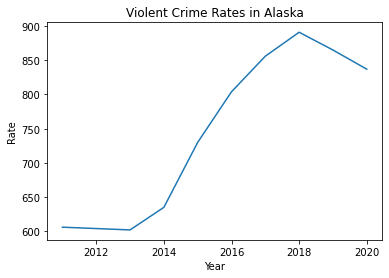

In [ ]:
#delete the first row
Q5tmp = df.drop(df.index[-df['State or Territory'].isin(['Alaska'])])
Q5tmp = Q5tmp.transpose()
Q5tmp.reset_index(inplace = True)
Q5tmp = Q5tmp[2:]
Q5tmp.rename(columns = {2 : 'Rate'}, inplace = True)
Q5tmp['Year'] = Q5tmp['index'].str[:4]     #access first four characters of a string-->make it numeric
Q5tmp['Rate'] = Q5tmp['Rate'].astype(int)
Q5tmp['Year'] = Q5tmp['Year'].astype(int)
x = np.array(Q5tmp['Year'])
y = np.array(Q5tmp['Rate'])
plt.plot(x,y)
plt.title('Violent Crime Rates in Alaska')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.show()

Students may opt to make a new column for Year, or they can use a long column name so long as data doesn't overlap on the X axis.

# Q6. Which States had crime rates go down in 2020 vs. 2019?

Print the unique values in the State column after you do your subset.

In [ ]:
# subset 1
CrimeRate_2020 = df['2020_Violent Crime Rate']
#subset 2
CrimeRate_2019 = df['2019_Violent Crime Rate']

df['State or Territory'][CrimeRate_2020 < CrimeRate_2019]



1     District of Columbia
2                   Alaska
3               New Mexico
13                  Nevada
15                 Alabama
17              California
24                Maryland
28                 Indiana
34           Massachusetts
36              Washington
37                  Oregon
42                  Hawaii
46                Virginia
47              New Jersey
48             Connecticut
49                 Vermont
50             Puerto Rico
51           New Hampshire
52                   Maine
Name: State or Territory, dtype: object

# Q7. Compute the raw change between 2020 and 2019 for all States and print summary statistics.
This one should have the raw units of Y - add a text cell and describe what you see in the summary statistics output.

In [ ]:
#create a column 2020-2019 for all rows/basically all states and print summary

df['Change_2020_2019'] = df['2020_Violent Crime Rate'] - df['2019_Violent Crime Rate']
Q7 = df[['State or Territory', 'Change_2020_2019']]
Q7.describe()




,Change_2020_2019
count,53.000000
mean,18.075472
std,45.075065
min,-54.500000
25%,-9.600000
50%,15.900000
75%,38.400000
max,207.700000


# Q8. Make a nice boxplot or histogram for the output from Q7.

Add nice labels and titles and a fun color for your boxplot.

Text(0, 0.5, 'Frequency')

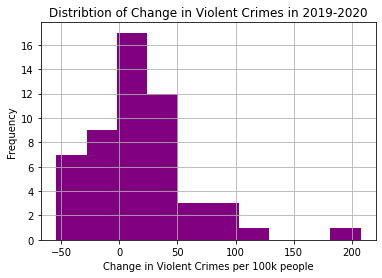

In [ ]:
#df.hist(figsize=(15,10)) # this makes the histogram plot
#plt.tight_layout() # space stuff out nicely (what happens without this?)
#plt.show()
df['Change_2020_2019'].hist(bins=10, color= 'purple')
plt.title('Distribtion of Change in Violent Crimes in 2019-2020')  
plt.xlabel('Change in Violent Crimes per 100k people')
plt.ylabel('Frequency')

# Q9. Compute the percentage change between 2020 and 2019 for all States and print summary statistics

This one should be a percentage, of course! Don't forget to multiply by 100. The denominator should be 2019.

In [ ]:
df['Percentage_Change_2020_2019'] = ((df['2020_Violent Crime Rate'] - df['2019_Violent Crime Rate'])/ df['2019_Violent Crime Rate']) * 100
Q9 = df[['State or Territory', 'Percentage_Change_2020_2019']]
Q9.describe()


,Percentage_Change_2020_2019
count,53.000000
mean,4.765077
std,11.372124
min,-18.925579
25%,-3.165183
50%,4.324324
75%,10.046433
max,46.454932


# Q10. Make a nice boxplot or histogram for the output from Q9.

Text(0, 0.5, 'Frequency')

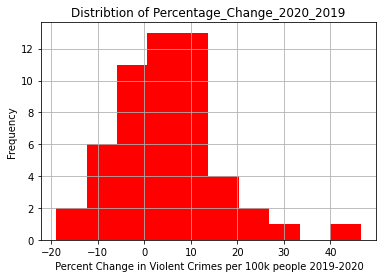

In [ ]:
df['Percentage_Change_2020_2019'].hist(bins=10, color= 'red')
plt.title('Distribtion of Percentage_Change_2020_2019')  
plt.xlabel(' Percent Change in Violent Crimes per 100k people 2019-2020')
plt.ylabel('Frequency')